# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
data_train = pd.read_csv('train_v9rqX0R.csv')

In [4]:
data_train.shape

(8523, 12)

In [29]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data = data_train.copy()

In [8]:
# seperating the numerical columns 
num_cols = [feature for feature in data.columns if data[feature].dtypes != 'O']

In [9]:
# categorical features
cat_cols = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [14]:
# missing values inspect
for feature in num_cols:
    print("missing values in {} are {}".format(feature , data[feature].isnull().mean()))

missing values in Item_Weight are 0.1716531737651062
missing values in Item_Visibility are 0.0
missing values in Item_MRP are 0.0
missing values in Outlet_Establishment_Year are 0.0
missing values in Item_Outlet_Sales are 0.0


In [59]:
testing = data_train.copy()
miss = [f for f in testing.columns if testing[f].isnull().sum()>0]
for feature in miss:
    testing[feature] = np.where(testing[feature].isnull() , 1 , 0) 

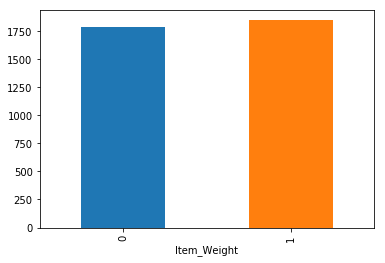

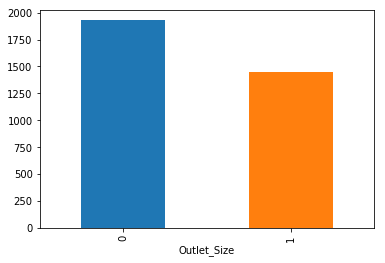

In [60]:
for feature in miss:
    testing.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.show()

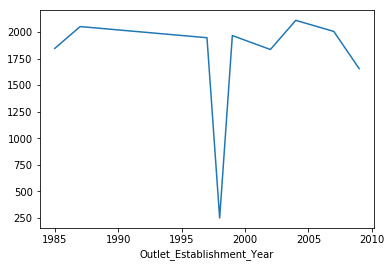

In [28]:
(data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median()).plot()
plt.show()

In [34]:
# seperating the continuous variables and discrete variables
discrete_cols = [feature for feature in num_cols if data[feature].nunique() < 50]
continuous_cols = [feature for feature in num_cols if feature not in discrete_cols]
print('no. of discrete feature ' , len(discrete_cols))
print('no. of continuous feature ' , len(continuous_cols))

no. of discrete feature  1
no. of continuous feature  4


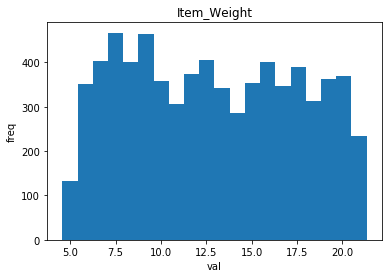

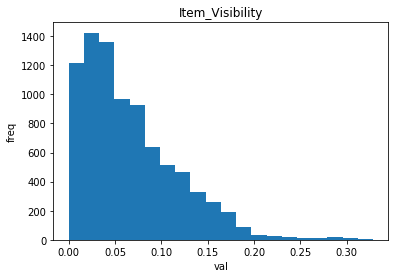

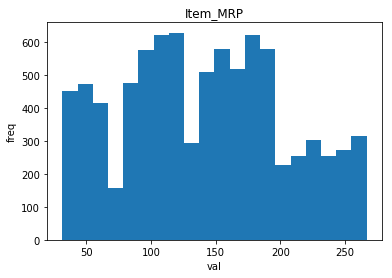

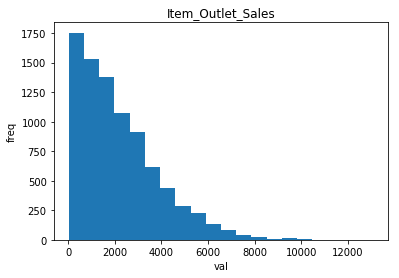

In [45]:
for feature in continuous_cols:
    plt.hist(data[feature] , bins = 20)
    plt.xlabel('val')
    plt.ylabel('freq')
    plt.title(feature)
    plt.show()

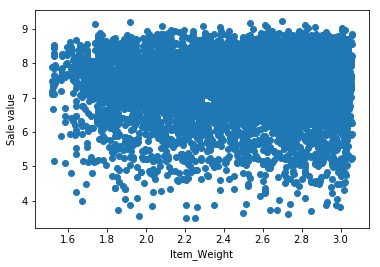

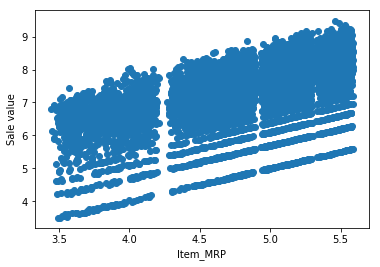

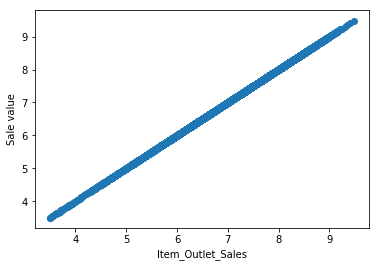

In [47]:
for feature in continuous_cols:
    data = data_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.scatter(np.log(data[feature]) , np.log(data['Item_Outlet_Sales']))
        plt.xlabel(feature)
        plt.ylabel('Sale value')
        plt.show()

# Outliers

In [48]:
continuous_cols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

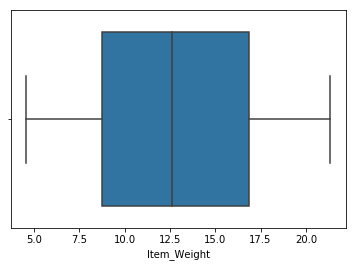

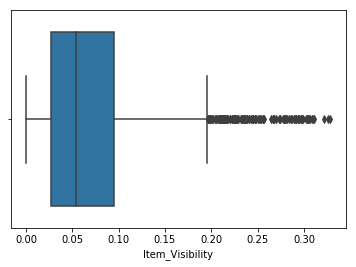

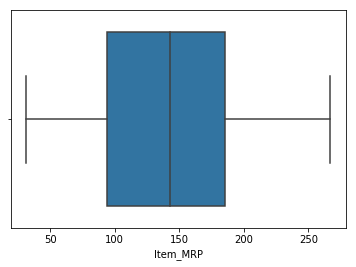

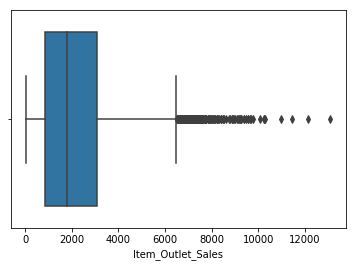

In [54]:
for feature in continuous_cols:
    plt.figure()
    sns.boxplot(data[feature])

In [61]:
# Categorical columns 
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [63]:
for feature in cat_cols:
    print(feature , ' \t' , data[feature].nunique())

Item_Identifier  	 1559
Item_Fat_Content  	 5
Item_Type  	 16
Outlet_Identifier  	 10
Outlet_Size  	 3
Outlet_Location_Type  	 3
Outlet_Type  	 4


In [66]:
desc = (data.groupby('Outlet_Identifier'))

In [67]:
desc.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
